In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [13]:
def scatter_plot(feature, target):
    plt.figure(figsize = (9, 7))
    plt.scatter(data[target], data[feature], c = "black")
    plt.xlabel("Money spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($)")
    plt.show()

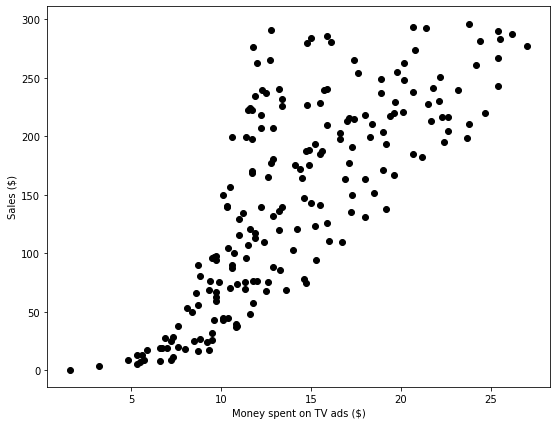

In [14]:
scatter_plot("TV", "Sales")

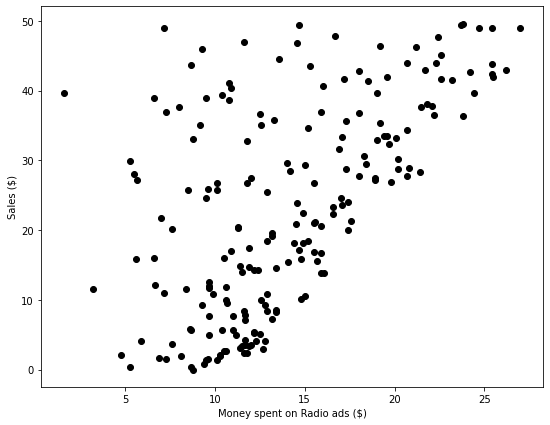

In [15]:
scatter_plot("Radio", "Sales")

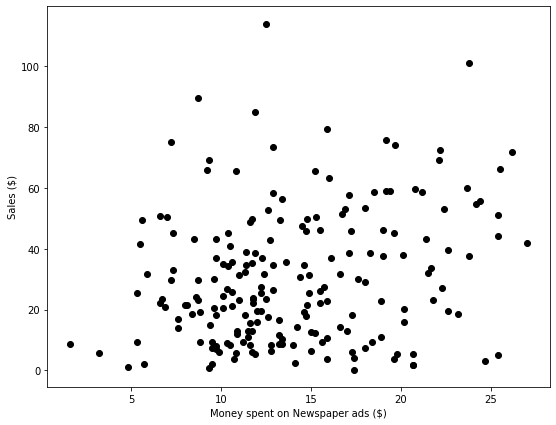

In [16]:
scatter_plot("Newspaper", "Sales")

In [17]:
# Linear Regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

xs = data.drop(["Sales"], axis = 1)
y = data.Sales.values.reshape(-1, 1)
linreg = LinearRegression()
MSE = cross_val_score(linreg, xs, y, scoring = "neg_mean_squared_error", cv = 5)

mean_MSE = np.mean(MSE)
print(mean_MSE)

-3.07294659710021


In [18]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [19]:
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

parameters = {"alpha" : [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring = "neg_mean_squared_error", cv = 5)
ridge_regression.fit(xs, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 0.1,
                                   1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [20]:
print(ridge_regression.best_params_)

{'alpha': 20}


In [21]:
print(ridge_regression.best_score_)

-3.072671338341143


In [23]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()

parameters = {"alpha" : [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring = "neg_mean_squared_error", cv=5)
lasso_regression.fit(xs, y)
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.6330184067651, tolerance: 0.43829494374999994
  model = cd_fast.enet_coordinate_descent(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.2169839442834, tolerance: 0.45029244375
  model = cd_fast.enet_coordinate_descent(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.3201080483578, tolerance: 0.41992074374999994
  model = cd_fast.enet_coordinate_descent(


{'alpha': 1}
-3.041405896751369
